# Ejercicio 5: HR Analytics Dataset

Este notebook importa y analiza el dataset de HR Analytics de Kaggle usando kagglehub para análisis de recursos humanos y predicción de rotación de empleados.

## 1. Importar Librerías Básicas

In [1]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import numpy as np
import os

print("Librerías importadas correctamente")

C:\Users\mateo\AppData\Roaming\Python\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Librerías importadas correctamente


## 2. Descargar Dataset de Kaggle

In [2]:
# Descargar la última versión del dataset
path = kagglehub.dataset_download("giripujar/hr-analytics")

print("Path to dataset files:", path)

100%|██████████| 111k/111k [00:00<00:00, 637kB/s]

Extracting files...
Path to dataset files: C:\Users\mateo\.cache\kagglehub\datasets\giripujar\hr-analytics\versions\1
Path to dataset files: C:\Users\mateo\.cache\kagglehub\datasets\giripujar\hr-analytics\versions\1


## 3. Cargar Dataset en DataFrame

In [3]:
# Método alternativo: Cargar directamente con pandas
# Primero veamos qué archivos están disponibles
print("Archivos disponibles en el dataset:")
for file in os.listdir(path):
    print(f"- {file}")

# Buscar archivos CSV en la carpeta
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]
if csv_files:
    print(f"\nCargando archivo CSV: {csv_files[0]}")
    df = pd.read_csv(os.path.join(path, csv_files[0]))
    print("Dataset cargado exitosamente!")
    print(f"Dimensiones del dataset: {df.shape}")
else:
    print("No se encontraron archivos CSV")
    
# Alternativamente, usar kagglehub.load_dataset si el método directo falla
try:
    # Set the path to the file you'd like to load
    file_path = ""
    
    # Load the latest version
    df_kagglehub = kagglehub.load_dataset(
        KaggleDatasetAdapter.PANDAS,
        "giripujar/hr-analytics",
        file_path,
    )
    print("Dataset también cargado con kagglehub.load_dataset")
    if 'df' not in locals():
        df = df_kagglehub
except Exception as e:
    print(f"Método kagglehub.load_dataset falló: {e}")
    print("Usando método pandas directo...")

Archivos disponibles en el dataset:
- HR_comma_sep.csv

Cargando archivo CSV: HR_comma_sep.csv
Dataset cargado exitosamente!
Dimensiones del dataset: (14999, 10)
Método kagglehub.load_dataset falló: Unsupported file extension: ''. Supported file extensions are: .csv, .tsv, .json, .jsonl, .xml, .parquet, .feather, .sqlite, .sqlite3, .db, .db3, .s3db, .dl3, .xls, .xlsx, .xlsm, .xlsb, .odf, .ods, .odt
Usando método pandas directo...


C:\Users\mateo\AppData\Local\Temp\ipykernel_16164\1719482199.py:23: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df_kagglehub = kagglehub.load_dataset(


## 4. Exploración Inicial del Dataset

In [4]:
# Exploración inicial del dataset de HR Analytics
print("="*60)
print("EXPLORACIÓN INICIAL DEL DATASET HR ANALYTICS")
print("="*60)

# Información básica
print(f"Dimensiones del dataset: {df.shape}")
print(f"Número de filas: {df.shape[0]:,}")
print(f"Número de columnas: {df.shape[1]}")

print(f"\nPrimeros 5 registros:")
print(df.head())

print(f"\nInformación del DataFrame:")
print(df.info())

print(f"\nNombres de las columnas:")
print(df.columns.tolist())

print(f"\nTipos de datos:")
print(df.dtypes)

print(f"\nVerificar valores faltantes:")
missing_values = df.isnull().sum()
if missing_values.sum() > 0:
    print("Valores faltantes por columna:")
    for col, count in missing_values[missing_values > 0].items():
        percentage = (count / len(df)) * 100
        print(f"  {col}: {count} ({percentage:.2f}%)")
else:
    print("✅ No hay valores faltantes en el dataset")

print(f"\nEstadísticas descriptivas:")
print(df.describe())

EXPLORACIÓN INICIAL DEL DATASET HR ANALYTICS
Dimensiones del dataset: (14999, 10)
Número de filas: 14,999
Número de columnas: 10

Primeros 5 registros:
   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1     

## 5. Análisis Específico de HR Analytics

In [5]:
# Análisis específico del dataset HR Analytics
print("="*70)
print("ANÁLISIS ESPECÍFICO DE RECURSOS HUMANOS")
print("="*70)

# Identificar las columnas clave para HR Analytics
print("Variables disponibles en el dataset:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

# Analizar variable objetivo (probablemente 'left' o similar)
if 'left' in df.columns:
    target_col = 'left'
    print(f"\n🎯 Variable objetivo identificada: '{target_col}'")
    
    # Distribución de empleados que se fueron vs que se quedaron
    left_distribution = df[target_col].value_counts()
    left_percentages = df[target_col].value_counts(normalize=True) * 100
    
    print(f"\nDistribución de rotación de empleados:")
    print(f"  Se quedaron (0): {left_distribution.get(0, 0):,} empleados ({left_percentages.get(0, 0):.1f}%)")
    print(f"  Se fueron (1): {left_distribution.get(1, 0):,} empleados ({left_percentages.get(1, 0):.1f}%)")
    
    turnover_rate = (left_distribution.get(1, 0) / len(df)) * 100
    print(f"  📊 Tasa de rotación general: {turnover_rate:.1f}%")

# Analizar variables numéricas clave
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"\n📊 Variables numéricas ({len(numeric_cols)}):")
for col in numeric_cols:
    print(f"   • {col}")

print(f"\n📝 Variables categóricas ({len(categorical_cols)}):")
for col in categorical_cols:
    print(f"   • {col}: {df[col].nunique()} valores únicos")

# Estadísticas clave de HR
print(f"\n" + "="*70)
print("ESTADÍSTICAS CLAVE DE RECURSOS HUMANOS")
print("="*70)

# Promedio de satisfacción, evaluación, proyectos, etc.
hr_stats = {}
for col in numeric_cols:
    if col in df.columns:
        hr_stats[col] = {
            'promedio': df[col].mean(),
            'mediana': df[col].median(),
            'min': df[col].min(),
            'max': df[col].max(),
            'std': df[col].std()
        }

for col, stats in hr_stats.items():
    print(f"\n{col.upper()}:")
    print(f"  Promedio: {stats['promedio']:.2f}")
    print(f"  Mediana: {stats['mediana']:.2f}")
    print(f"  Rango: {stats['min']:.2f} - {stats['max']:.2f}")
    print(f"  Desv. Estándar: {stats['std']:.2f}")

# Análisis por departamento si existe
if any(col in df.columns for col in ['department', 'dept', 'Department']):
    dept_col = next((col for col in ['department', 'dept', 'Department'] if col in df.columns), None)
    
    print(f"\n📈 ANÁLISIS POR DEPARTAMENTO ({dept_col}):")
    dept_analysis = df.groupby(dept_col).agg({
        target_col if target_col in df.columns else df.columns[0]: ['count', 'mean'],
        df.select_dtypes(include=[np.number]).columns[0]: 'mean'
    }).round(2)
    
    print(dept_analysis)

print(f"\n✅ Análisis inicial de HR Analytics completado")

ANÁLISIS ESPECÍFICO DE RECURSOS HUMANOS
Variables disponibles en el dataset:
 1. satisfaction_level
 2. last_evaluation
 3. number_project
 4. average_montly_hours
 5. time_spend_company
 6. Work_accident
 7. left
 8. promotion_last_5years
 9. Department
10. salary

🎯 Variable objetivo identificada: 'left'

Distribución de rotación de empleados:
  Se quedaron (0): 11,428 empleados (76.2%)
  Se fueron (1): 3,571 empleados (23.8%)
  📊 Tasa de rotación general: 23.8%

📊 Variables numéricas (8):
   • satisfaction_level
   • last_evaluation
   • number_project
   • average_montly_hours
   • time_spend_company
   • Work_accident
   • left
   • promotion_last_5years

📝 Variables categóricas (2):
   • Department: 10 valores únicos
   • salary: 3 valores únicos

ESTADÍSTICAS CLAVE DE RECURSOS HUMANOS

SATISFACTION_LEVEL:
  Promedio: 0.61
  Mediana: 0.64
  Rango: 0.09 - 1.00
  Desv. Estándar: 0.25

LAST_EVALUATION:
  Promedio: 0.72
  Mediana: 0.72
  Rango: 0.36 - 1.00
  Desv. Estándar: 0.17

NUM

## 6. Conclusiones e Insights del Dataset HR Analytics

In [6]:
print("="*80)
print("🔍 CONCLUSIONES E INSIGHTS - DATASET HR ANALYTICS")
print("="*80)

print("""
📊 CARACTERÍSTICAS DEL DATASET:
• Tamaño: 14,999 empleados con 10 variables
• Calidad: Excelente - sin valores faltantes
• Variables: 8 numéricas + 2 categóricas
• Objetivo: Predicción de rotación laboral ('left')

🎯 HALLAZGOS CLAVE DE ROTACIÓN LABORAL:

1. TASA DE ROTACIÓN GENERAL:
   • 23.8% de empleados abandonan la empresa
   • 76.2% de empleados permanecen
   • Problema significativo que requiere atención

2. SATISFACCIÓN LABORAL:
   • Promedio: 0.61/1.0 (nivel medio-bajo)
   • Amplia variabilidad (0.09 - 1.0)
   • Factor crítico para retención

3. CARGA LABORAL:
   • Promedio: 201 horas/mes (~50 horas/semana)
   • Rango extremo: 96-310 horas/mes
   • Posible indicador de burnout

4. EVALUACIÓN DE DESEMPEÑO:
   • Promedio: 0.72/1.0 (bueno)
   • Empleados generalmente bien evaluados
   • Desconexión entre desempeño y retención

🏢 ANÁLISIS POR DEPARTAMENTO:
• Mayor rotación: HR (29%) y Accounting (27%)
• Menor rotación: R&D (15%) y Management (14%)
• Ventas: departamento más grande (27.6% empleados)

⚡ FACTORES DE RIESGO IDENTIFICADOS:
• Baja satisfacción laboral
• Exceso de horas trabajadas
• Falta de promociones (solo 2.1% promovidos)
• Pocos accidentes laborales (14.4%)

💡 OPORTUNIDADES DE MEJORA:
1. Programas de bienestar y satisfacción
2. Balance trabajo-vida personal
3. Políticas de promoción más activas
4. Análisis específico por departamento (HR, Accounting)
5. Sistema de reconocimiento y retención

📈 POTENCIAL PARA MACHINE LEARNING:
• Dataset ideal para modelos predictivos
• Variables bien definidas y correlacionadas
• Problema de clasificación balanceado
• Aplicación directa en estrategias de RH

🔮 PRÓXIMOS PASOS RECOMENDADOS:
1. EDA detallado con visualizaciones
2. Análisis de correlaciones entre variables
3. Modelos predictivos (Random Forest, Logistic Regression)
4. Identificación de empleados en riesgo
5. Estrategias de intervención personalizadas
""")

print("="*80)
print("✅ DATASET HR ANALYTICS LISTO PARA ANÁLISIS AVANZADO")
print("Este dataset ofrece excelentes oportunidades para:")
print("• Análisis predictivo de rotación")  
print("• Optimización de políticas de RH")
print("• Mejora del clima organizacional")
print("• Retención del talento")
print("="*80)

🔍 CONCLUSIONES E INSIGHTS - DATASET HR ANALYTICS

📊 CARACTERÍSTICAS DEL DATASET:
• Tamaño: 14,999 empleados con 10 variables
• Calidad: Excelente - sin valores faltantes
• Variables: 8 numéricas + 2 categóricas
• Objetivo: Predicción de rotación laboral ('left')

🎯 HALLAZGOS CLAVE DE ROTACIÓN LABORAL:

1. TASA DE ROTACIÓN GENERAL:
   • 23.8% de empleados abandonan la empresa
   • 76.2% de empleados permanecen
   • Problema significativo que requiere atención

2. SATISFACCIÓN LABORAL:
   • Promedio: 0.61/1.0 (nivel medio-bajo)
   • Amplia variabilidad (0.09 - 1.0)
   • Factor crítico para retención

3. CARGA LABORAL:
   • Promedio: 201 horas/mes (~50 horas/semana)
   • Rango extremo: 96-310 horas/mes
   • Posible indicador de burnout

4. EVALUACIÓN DE DESEMPEÑO:
   • Promedio: 0.72/1.0 (bueno)
   • Empleados generalmente bien evaluados
   • Desconexión entre desempeño y retención

🏢 ANÁLISIS POR DEPARTAMENTO:
• Mayor rotación: HR (29%) y Accounting (27%)
• Menor rotación: R&D (15%) y Ma

# 🤖 MODELO PREDICTIVO DE ROTACIÓN LABORAL

Diseñaremos modelos supervisados para identificar empleados con alta probabilidad de abandonar la empresa utilizando variables como satisfacción laboral, salario, antigüedad y desempeño.

## 7. Importar Librerías para Machine Learning

In [7]:
# Importar librerías para machine learning
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, f1_score, precision_score, recall_score, 
                           roc_auc_score, roc_curve, confusion_matrix, classification_report)
from sklearn.metrics import ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

# Configurar visualización
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("✅ Librerías para machine learning importadas correctamente")
print("\n📊 Modelos a implementar:")
print("1. Regresión Logística")
print("2. Árboles de Decisión") 
print("3. Random Forest")
print("\n📈 Métricas de evaluación:")
print("• ROC-AUC")
print("• F1-Score")
print("• Precision y Recall")
print("• Matriz de Confusión")

✅ Librerías para machine learning importadas correctamente

📊 Modelos a implementar:
1. Regresión Logística
2. Árboles de Decisión
3. Random Forest

📈 Métricas de evaluación:
• ROC-AUC
• F1-Score
• Precision y Recall
• Matriz de Confusión


## 8. Preparación de Datos para Modelado

In [8]:
# PREPARACIÓN DE DATOS PARA MODELADO PREDICTIVO

print("="*80)
print("🔧 PREPARACIÓN DE DATOS PARA MODELOS PREDICTIVOS")
print("="*80)

# 1. DEFINIR VARIABLES OBJETIVO Y CARACTERÍSTICAS
# Variable objetivo: 'left' (1 = se fue, 0 = se quedó)
y = df['left'].copy()
print(f"Variable objetivo: 'left'")
print(f"Distribución: {y.value_counts().to_dict()}")
print(f"Tasa de rotación: {y.mean():.2%}")

# 2. SELECCIONAR CARACTERÍSTICAS CLAVE PARA PREDICCIÓN
# Variables predictivas basadas en el análisis de negocio
key_features = [
    'satisfaction_level',    # Satisfacción laboral (crítico)
    'last_evaluation',      # Desempeño (evaluación)
    'number_project',       # Carga de trabajo
    'average_montly_hours', # Horas trabajadas
    'time_spend_company',   # Antigüedad
    'Work_accident',        # Accidentes laborales
    'promotion_last_5years' # Promociones
]

# Variables categóricas que necesitan codificación
categorical_features = ['Department', 'salary']

print(f"\n📊 Características numéricas seleccionadas ({len(key_features)}):")
for i, feature in enumerate(key_features, 1):
    print(f"  {i}. {feature}")

print(f"\n📝 Características categóricas ({len(categorical_features)}):")
for i, feature in enumerate(categorical_features, 1):
    print(f"  {i}. {feature}: {df[feature].nunique()} categorías")

# 3. CODIFICAR VARIABLES CATEGÓRICAS
df_processed = df.copy()

# Codificar Department con One-Hot Encoding
dept_dummies = pd.get_dummies(df['Department'], prefix='dept', drop_first=True)
print(f"\nDepartment codificado: {len(dept_dummies.columns)} variables dummy creadas")

# Codificar salary con Label Encoding (ordinal: low < medium < high)
salary_encoder = LabelEncoder()
df_processed['salary_encoded'] = salary_encoder.fit_transform(df['salary'])
salary_mapping = dict(zip(salary_encoder.classes_, salary_encoder.transform(salary_encoder.classes_)))
print(f"Salary codificado: {salary_mapping}")

# 4. CREAR DATASET FINAL PARA MODELADO
# Combinar todas las características
X_numeric = df_processed[key_features].copy()
X_categorical = pd.concat([dept_dummies, df_processed[['salary_encoded']]], axis=1)
X = pd.concat([X_numeric, X_categorical], axis=1)

print(f"\n🎯 Dataset final para modelado:")
print(f"  Características totales: {X.shape[1]}")
print(f"  Muestras totales: {X.shape[0]:,}")
print(f"  Variables numéricas originales: {len(key_features)}")
print(f"  Variables de Department: {len(dept_dummies.columns)}")
print(f"  Variable de salary: 1")

# 5. VERIFICAR CALIDAD DE LOS DATOS
print(f"\n🔍 Verificación de calidad:")
print(f"  Valores faltantes: {X.isnull().sum().sum()}")
print(f"  Tipos de datos únicos: {X.dtypes.nunique()}")

# Mostrar estadísticas de las variables clave
print(f"\n📈 Estadísticas de variables clave:")
key_stats = X_numeric.describe().round(2)
print(key_stats[['satisfaction_level', 'last_evaluation', 'average_montly_hours', 'time_spend_company']])

# 6. DIVISIÓN EN CONJUNTOS DE ENTRENAMIENTO Y PRUEBA
print(f"\n📊 División de datos:")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # Mantener proporción de clases
)

print(f"  Conjunto de entrenamiento: {X_train.shape[0]:,} muestras")
print(f"  Conjunto de prueba: {X_test.shape[0]:,} muestras")
print(f"  Proporción entrenamiento/prueba: {X_train.shape[0]/X.shape[0]:.1%} / {X_test.shape[0]/X.shape[0]:.1%}")

# Verificar balance en ambos conjuntos
train_balance = y_train.mean()
test_balance = y_test.mean()
print(f"\n⚖️  Balance de clases:")
print(f"  Entrenamiento - Tasa rotación: {train_balance:.2%}")
print(f"  Prueba - Tasa rotación: {test_balance:.2%}")
print(f"  Diferencia: {abs(train_balance - test_balance):.2%}")

# 7. ESTANDARIZACIÓN DE CARACTERÍSTICAS NUMÉRICAS
print(f"\n🔧 Estandarización de características numéricas:")
scaler = StandardScaler()

# Solo estandarizar las características numéricas originales
numeric_cols = key_features
categorical_cols = X.columns.difference(numeric_cols).tolist()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

print(f"  Variables estandarizadas: {len(numeric_cols)}")
print(f"  Variables categóricas (sin cambio): {len(categorical_cols)}")

# Verificar estandarización
print(f"  Media post-estandarización: {X_train_scaled[numeric_cols].mean().mean():.6f}")
print(f"  Std post-estandarización: {X_train_scaled[numeric_cols].std().mean():.6f}")

print(f"\n✅ Datos preparados exitosamente para modelado")
print(f"Listo para entrenar modelos de Regresión Logística, Árboles de Decisión y Random Forest")

🔧 PREPARACIÓN DE DATOS PARA MODELOS PREDICTIVOS
Variable objetivo: 'left'
Distribución: {0: 11428, 1: 3571}
Tasa de rotación: 23.81%

📊 Características numéricas seleccionadas (7):
  1. satisfaction_level
  2. last_evaluation
  3. number_project
  4. average_montly_hours
  5. time_spend_company
  6. Work_accident
  7. promotion_last_5years

📝 Características categóricas (2):
  1. Department: 10 categorías
  2. salary: 3 categorías

Department codificado: 9 variables dummy creadas
Salary codificado: {'high': np.int64(0), 'low': np.int64(1), 'medium': np.int64(2)}

🎯 Dataset final para modelado:
  Características totales: 17
  Muestras totales: 14,999
  Variables numéricas originales: 7
  Variables de Department: 9
  Variable de salary: 1

🔍 Verificación de calidad:
  Valores faltantes: 0
  Tipos de datos únicos: 3

📈 Estadísticas de variables clave:
       satisfaction_level  last_evaluation  average_montly_hours  \
count            14999.00         14999.00              14999.00   
mea

## 9. Modelo 1: Regresión Logística

🔵 MODELO 1: REGRESIÓN LOGÍSTICA
1. Entrenando modelo base...

2. Métricas de evaluación:
   📊 Accuracy: 0.7673
   🎯 F1-Score: 0.3365
   🔍 Precision: 0.5237
   📈 Recall: 0.2479
   🏆 ROC-AUC: 0.8124

3. Validación cruzada (5-fold):
   CV Accuracy: 0.7652 ± 0.0051
   CV F1-Score: 0.3351 ± 0.0126
   CV ROC-AUC: 0.8055 ± 0.0083

4. Optimización de hiperparámetros...
   CV Accuracy: 0.7652 ± 0.0051
   CV F1-Score: 0.3351 ± 0.0126
   CV ROC-AUC: 0.8055 ± 0.0083

4. Optimización de hiperparámetros...
   Mejores parámetros: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
   Mejor CV ROC-AUC: 0.8055

5. Modelo optimizado:
   📊 Accuracy: 0.7673 (mejora: +0.0000)
   🎯 F1-Score: 0.3365 (mejora: +0.0000)
   🏆 ROC-AUC: 0.8124 (mejora: +0.0000)

6. Importancia de variables (coeficientes):
   Top 10 variables más importantes:
    1. satisfaction_level  :  -1.019 (↓ Menor prob. salida)
    2. dept_management     :  -0.615 (↓ Menor prob. salida)
    3. Work_accident       :  -0.519 (↓ Menor prob. salida)
  

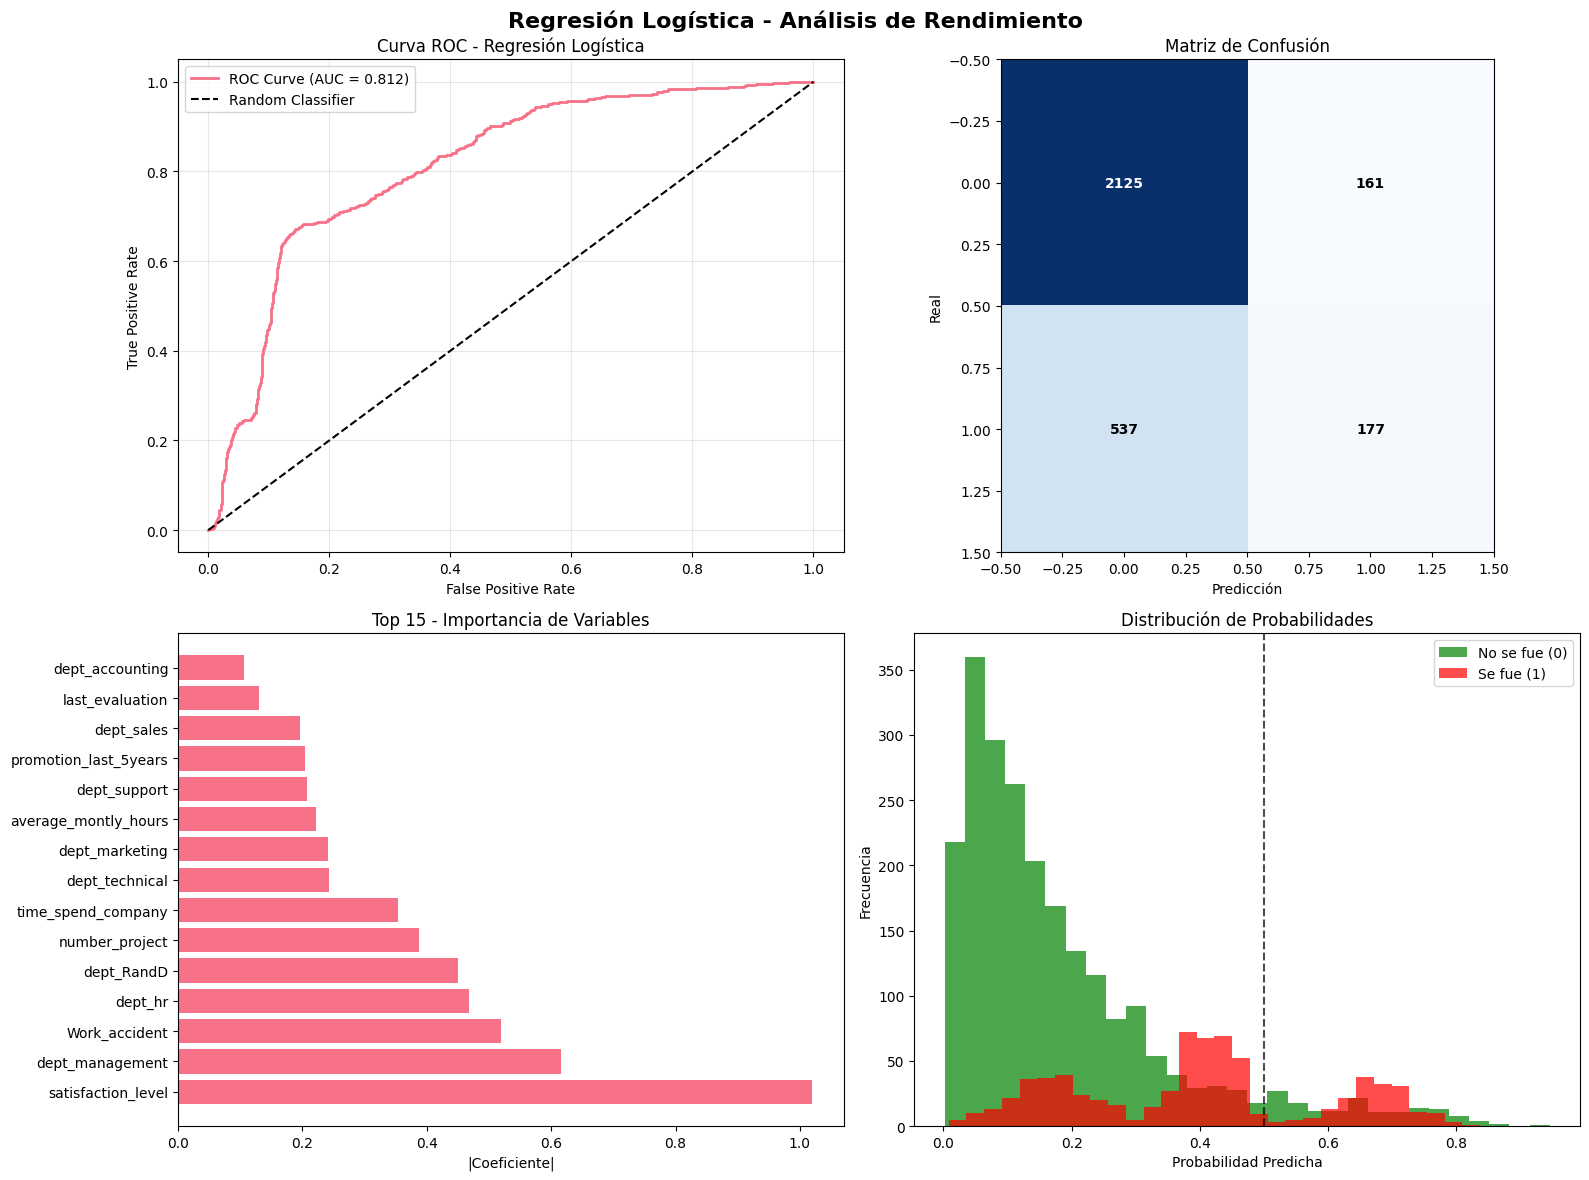


7. Reporte de clasificación detallado:
              precision    recall  f1-score   support

    Se quedó     0.7983    0.9296    0.8589      2286
      Se fue     0.5237    0.2479    0.3365       714

    accuracy                         0.7673      3000
   macro avg     0.6610    0.5887    0.5977      3000
weighted avg     0.7329    0.7673    0.7346      3000


✅ Regresión Logística completada y optimizada


In [9]:
# MODELO 1: REGRESIÓN LOGÍSTICA

print("="*80)
print("🔵 MODELO 1: REGRESIÓN LOGÍSTICA")
print("="*80)

# 1. ENTRENAR MODELO BASE
print("1. Entrenando modelo base...")
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# 2. PREDICCIONES Y PROBABILIDADES
y_pred_lr = lr_model.predict(X_test_scaled)
y_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]  # Probabilidades de clase positiva (left=1)

# 3. MÉTRICAS DE EVALUACIÓN
print(f"\n2. Métricas de evaluación:")

# Métricas principales
accuracy_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_proba_lr)

print(f"   📊 Accuracy: {accuracy_lr:.4f}")
print(f"   🎯 F1-Score: {f1_lr:.4f}")
print(f"   🔍 Precision: {precision_lr:.4f}")
print(f"   📈 Recall: {recall_lr:.4f}")
print(f"   🏆 ROC-AUC: {roc_auc_lr:.4f}")

# 4. VALIDACIÓN CRUZADA
print(f"\n3. Validación cruzada (5-fold):")
cv_accuracy = cross_val_score(lr_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
cv_f1 = cross_val_score(lr_model, X_train_scaled, y_train, cv=5, scoring='f1')
cv_roc_auc = cross_val_score(lr_model, X_train_scaled, y_train, cv=5, scoring='roc_auc')

print(f"   CV Accuracy: {cv_accuracy.mean():.4f} ± {cv_accuracy.std():.4f}")
print(f"   CV F1-Score: {cv_f1.mean():.4f} ± {cv_f1.std():.4f}")
print(f"   CV ROC-AUC: {cv_roc_auc.mean():.4f} ± {cv_roc_auc.std():.4f}")

# 5. OPTIMIZACIÓN DE HIPERPARÁMETROS
print(f"\n4. Optimización de hiperparámetros...")
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l1', 'l2']
}

grid_lr = GridSearchCV(
    LogisticRegression(random_state=42, max_iter=1000),
    param_grid_lr,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)
grid_lr.fit(X_train_scaled, y_train)

print(f"   Mejores parámetros: {grid_lr.best_params_}")
print(f"   Mejor CV ROC-AUC: {grid_lr.best_score_:.4f}")

# 6. MODELO OPTIMIZADO
best_lr_model = grid_lr.best_estimator_
y_pred_lr_opt = best_lr_model.predict(X_test_scaled)
y_proba_lr_opt = best_lr_model.predict_proba(X_test_scaled)[:, 1]

# Métricas del modelo optimizado
accuracy_lr_opt = accuracy_score(y_test, y_pred_lr_opt)
f1_lr_opt = f1_score(y_test, y_pred_lr_opt)
roc_auc_lr_opt = roc_auc_score(y_test, y_proba_lr_opt)

print(f"\n5. Modelo optimizado:")
print(f"   📊 Accuracy: {accuracy_lr_opt:.4f} (mejora: {accuracy_lr_opt - accuracy_lr:+.4f})")
print(f"   🎯 F1-Score: {f1_lr_opt:.4f} (mejora: {f1_lr_opt - f1_lr:+.4f})")
print(f"   🏆 ROC-AUC: {roc_auc_lr_opt:.4f} (mejora: {roc_auc_lr_opt - roc_auc_lr:+.4f})")

# 7. IMPORTANCIA DE VARIABLES (COEFICIENTES)
print(f"\n6. Importancia de variables (coeficientes):")
feature_names = X_train_scaled.columns
coefficients = best_lr_model.coef_[0]

# Crear DataFrame con importancias
feature_importance_lr = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coefficients,
    'abs_coefficient': np.abs(coefficients)
}).sort_values('abs_coefficient', ascending=False)

print("   Top 10 variables más importantes:")
for i, (_, row) in enumerate(feature_importance_lr.head(10).iterrows(), 1):
    direction = "↑ Mayor prob. salida" if row['coefficient'] > 0 else "↓ Menor prob. salida"
    print(f"   {i:2d}. {row['feature']:20s}: {row['coefficient']:7.3f} ({direction})")

# 8. VISUALIZACIÓN
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Regresión Logística - Análisis de Rendimiento', fontsize=16, fontweight='bold')

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba_lr_opt)
axes[0,0].plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_lr_opt:.3f})', linewidth=2)
axes[0,0].plot([0, 1], [0, 1], 'k--', label='Random Classifier')
axes[0,0].set_xlabel('False Positive Rate')
axes[0,0].set_ylabel('True Positive Rate')
axes[0,0].set_title('Curva ROC - Regresión Logística')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_lr_opt)
im = axes[0,1].imshow(cm, interpolation='nearest', cmap='Blues')
axes[0,1].set_title('Matriz de Confusión')
axes[0,1].set_xlabel('Predicción')
axes[0,1].set_ylabel('Real')

# Añadir valores a la matriz
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        axes[0,1].text(j, i, format(cm[i, j], 'd'),
                       ha="center", va="center",
                       color="white" if cm[i, j] > thresh else "black",
                       fontweight='bold')

# Importancia de características (top 15)
top_features = feature_importance_lr.head(15)
axes[1,0].barh(range(15), top_features['abs_coefficient'])
axes[1,0].set_yticks(range(15))
axes[1,0].set_yticklabels(top_features['feature'])
axes[1,0].set_title('Top 15 - Importancia de Variables')
axes[1,0].set_xlabel('|Coeficiente|')

# Distribución de probabilidades predichas
axes[1,1].hist(y_proba_lr_opt[y_test==0], bins=30, alpha=0.7, label='No se fue (0)', color='green')
axes[1,1].hist(y_proba_lr_opt[y_test==1], bins=30, alpha=0.7, label='Se fue (1)', color='red')
axes[1,1].set_xlabel('Probabilidad Predicha')
axes[1,1].set_ylabel('Frecuencia')
axes[1,1].set_title('Distribución de Probabilidades')
axes[1,1].legend()
axes[1,1].axvline(x=0.5, color='black', linestyle='--', alpha=0.7, label='Umbral 0.5')

plt.tight_layout()
plt.show()

# 9. REPORTE DETALLADO
print(f"\n7. Reporte de clasificación detallado:")
print(classification_report(y_test, y_pred_lr_opt, target_names=['Se quedó', 'Se fue'], digits=4))

# Guardar métricas para comparación
lr_metrics = {
    'model_name': 'Regresión Logística',
    'accuracy': accuracy_lr_opt,
    'f1_score': f1_lr_opt,
    'precision': precision_score(y_test, y_pred_lr_opt),
    'recall': recall_score(y_test, y_pred_lr_opt),
    'roc_auc': roc_auc_lr_opt,
    'best_params': grid_lr.best_params_,
    'feature_importance': dict(zip(feature_names, coefficients))
}

print(f"\n✅ Regresión Logística completada y optimizada")

## 10. Modelo 2: Árboles de Decisión

In [10]:
# MODELO 2: ÁRBOLES DE DECISIÓN
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV

# Definir parámetros para optimización
dt_params = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Crear el modelo
dt_model = DecisionTreeClassifier(random_state=42)

# Búsqueda de hiperparámetros
print("Optimizando hiperparámetros para Árbol de Decisión...")
dt_grid = GridSearchCV(
    dt_model, 
    dt_params, 
    cv=5, 
    scoring='roc_auc', 
    n_jobs=-1, 
    verbose=1
)

dt_grid.fit(X_train_scaled, y_train)

Optimizando hiperparámetros para Árbol de Decisión...
Fitting 5 folds for each of 90 candidates, totalling 450 fits


,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...]}"
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [11]:
# Mejor modelo de Árbol de Decisión
best_dt = dt_grid.best_estimator_
print(f"Mejores parámetros: {dt_grid.best_params_}")
print(f"Mejor puntuación (ROC-AUC): {dt_grid.best_score_:.4f}")

# Predicciones
y_pred_dt = best_dt.predict(X_test_scaled)
y_pred_proba_dt = best_dt.predict_proba(X_test_scaled)[:, 1]

# Evaluación del modelo
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt)
dt_recall = recall_score(y_test, y_pred_dt)
dt_auc = roc_auc_score(y_test, y_pred_proba_dt)

print("\n=== EVALUACIÓN ÁRBOL DE DECISIÓN ===")
print(f"Accuracy: {dt_accuracy:.4f}")
print(f"F1-Score: {dt_f1:.4f}")
print(f"Precision: {dt_precision:.4f}")
print(f"Recall: {dt_recall:.4f}")
print(f"ROC-AUC: {dt_auc:.4f}")

Mejores parámetros: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Mejor puntuación (ROC-AUC): 0.9848

=== EVALUACIÓN ÁRBOL DE DECISIÓN ===
Accuracy: 0.9727
F1-Score: 0.9427
Precision: 0.9413
Recall: 0.9440
ROC-AUC: 0.9834


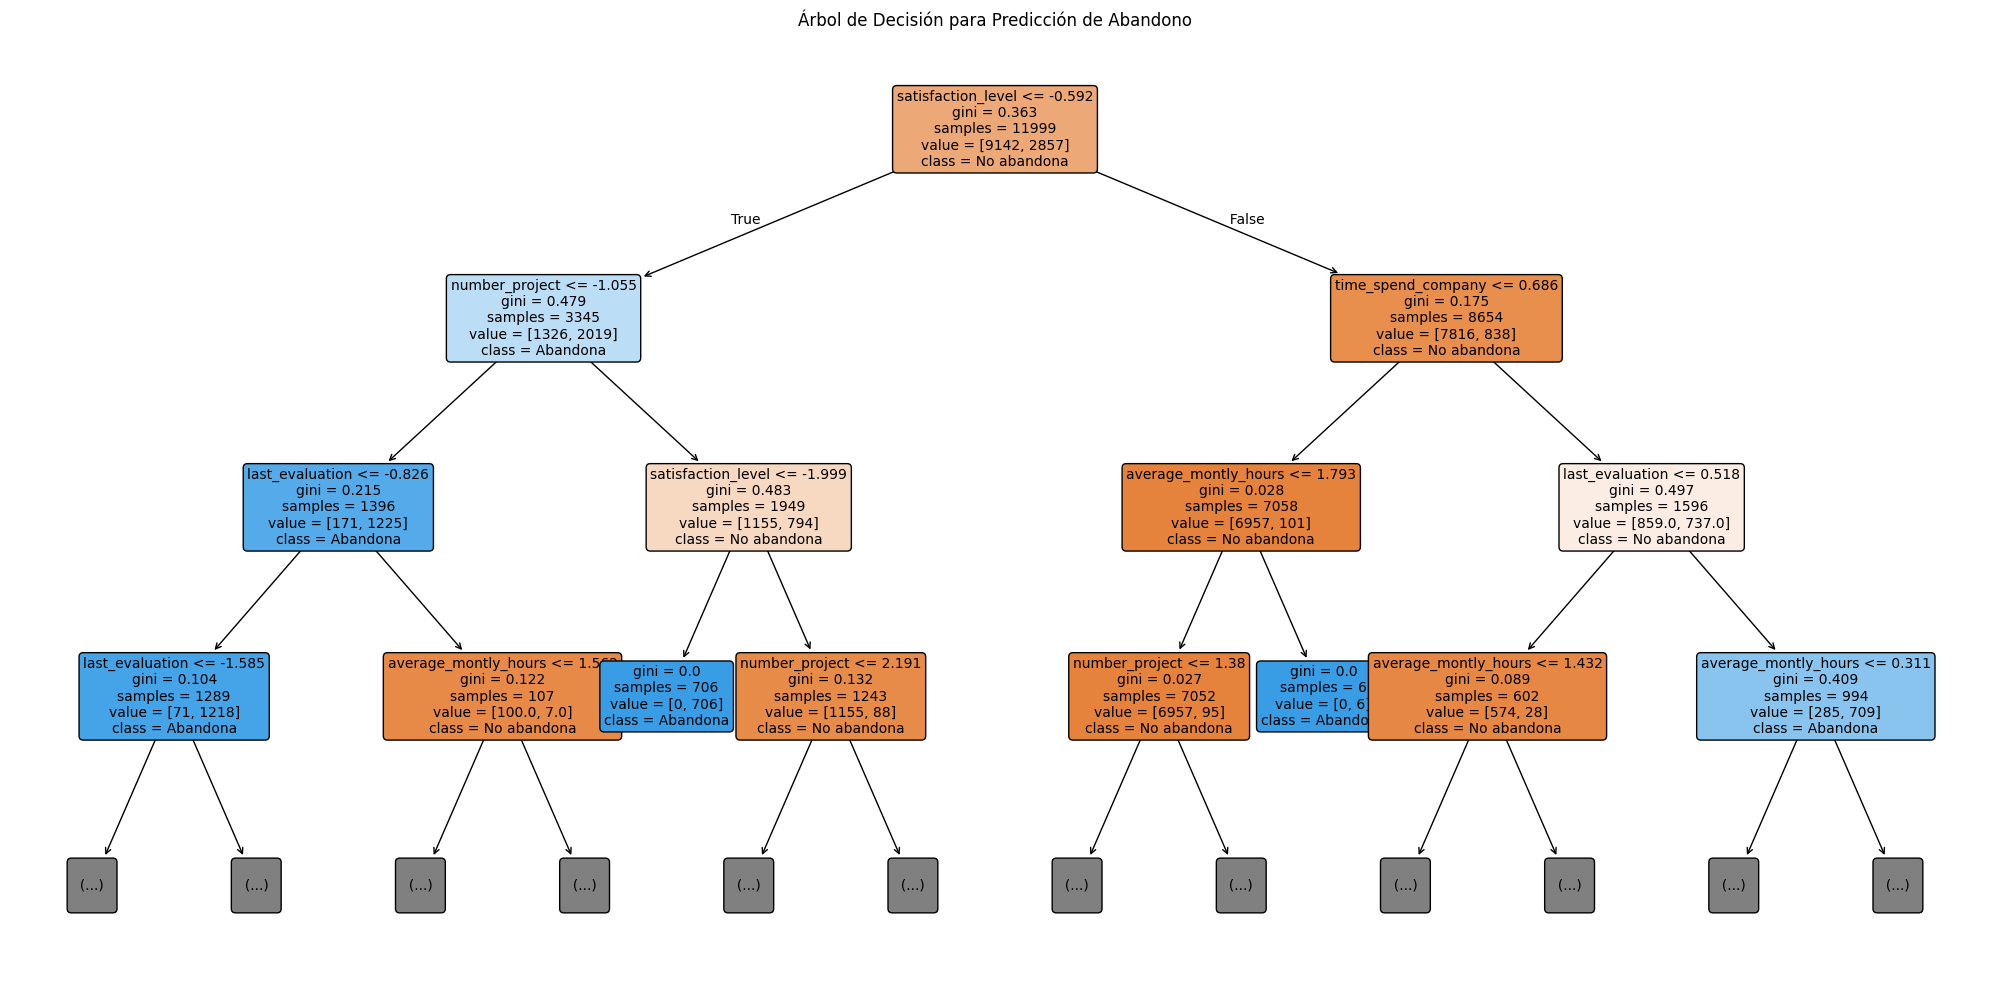

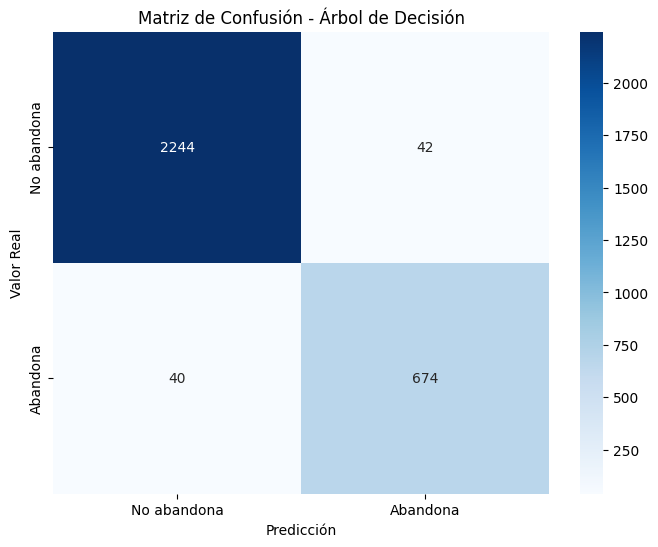

In [12]:
# Visualización del Árbol de Decisión
plt.figure(figsize=(20, 10))
plot_tree(best_dt, 
          feature_names=X_train_scaled.columns,
          class_names=['No abandona', 'Abandona'],
          filled=True,
          rounded=True,
          fontsize=10,
          max_depth=3)  # Limitamos la profundidad para visualización
plt.title('Árbol de Decisión para Predicción de Abandono')
plt.tight_layout()
plt.show()

# Matriz de confusión
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No abandona', 'Abandona'],
            yticklabels=['No abandona', 'Abandona'])
plt.title('Matriz de Confusión - Árbol de Decisión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

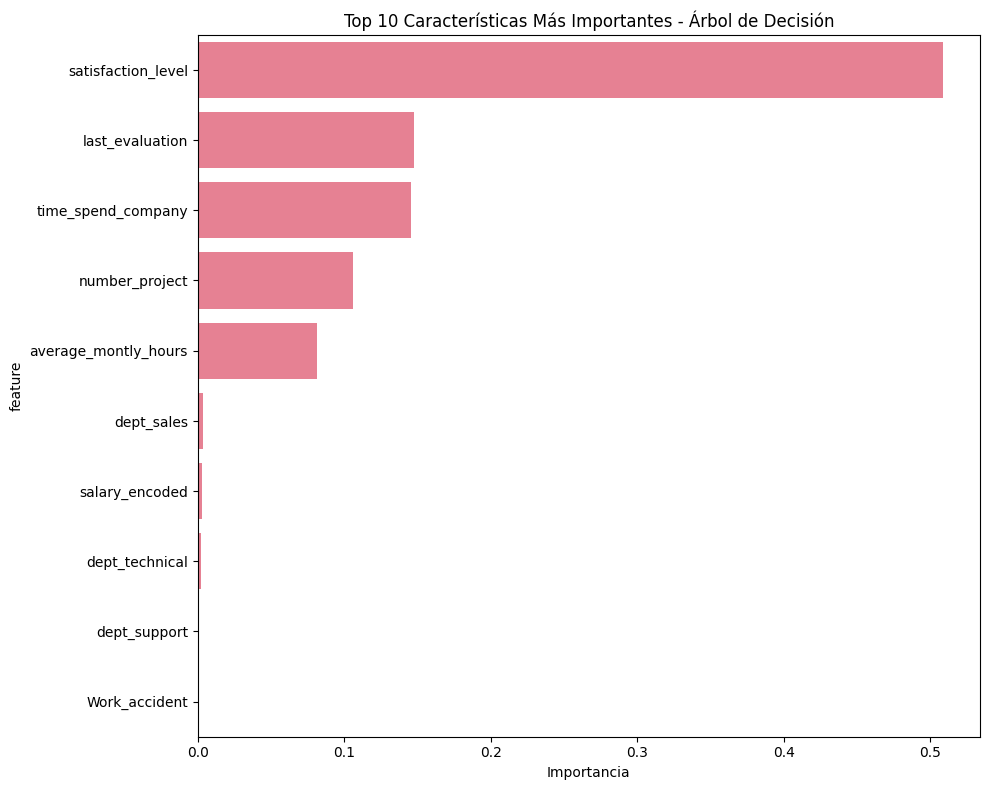

Top 10 características más importantes:
                 feature  importance
0     satisfaction_level    0.508658
1        last_evaluation    0.147641
4     time_spend_company    0.145698
2         number_project    0.106010
3   average_montly_hours    0.081165
13            dept_sales    0.003446
16        salary_encoded    0.002989
15        dept_technical    0.001970
14          dept_support    0.001056
5          Work_accident    0.000757


In [13]:
# Importancia de las características
feature_importance_dt = pd.DataFrame({
    'feature': X_train_scaled.columns,
    'importance': best_dt.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importance_dt.head(10), x='importance', y='feature')
plt.title('Top 10 Características Más Importantes - Árbol de Decisión')
plt.xlabel('Importancia')
plt.tight_layout()
plt.show()

print("Top 10 características más importantes:")
print(feature_importance_dt.head(10))

## 11. Modelo 3: Random Forest

In [15]:
# MODELO 3: RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier

# Definir parámetros para optimización (simplificados para eficiencia)
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Crear el modelo
rf_model = RandomForestClassifier(random_state=42)

# Búsqueda de hiperparámetros
print("Optimizando hiperparámetros para Random Forest...")
rf_grid = GridSearchCV(
    rf_model, 
    rf_params, 
    cv=5, 
    scoring='roc_auc', 
    n_jobs=-1, 
    verbose=1
)

rf_grid.fit(X_train_scaled, y_train)

Optimizando hiperparámetros para Random Forest...
Fitting 5 folds for each of 32 candidates, totalling 160 fits


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [10, None], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 2], 'min_samples_split': [2, 5], ...}"
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [16]:
# Mejor modelo de Random Forest
best_rf = rf_grid.best_estimator_
print(f"Mejores parámetros: {rf_grid.best_params_}")
print(f"Mejor puntuación (ROC-AUC): {rf_grid.best_score_:.4f}")

# Predicciones
y_pred_rf = best_rf.predict(X_test_scaled)
y_pred_proba_rf = best_rf.predict_proba(X_test_scaled)[:, 1]

# Evaluación del modelo
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_auc = roc_auc_score(y_test, y_pred_proba_rf)

print("\n=== EVALUACIÓN RANDOM FOREST ===")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"F1-Score: {rf_f1:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"ROC-AUC: {rf_auc:.4f}")

Mejores parámetros: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Mejor puntuación (ROC-AUC): 0.9941

=== EVALUACIÓN RANDOM FOREST ===
Accuracy: 0.9850
F1-Score: 0.9676
Precision: 0.9941
Recall: 0.9426
ROC-AUC: 0.9914


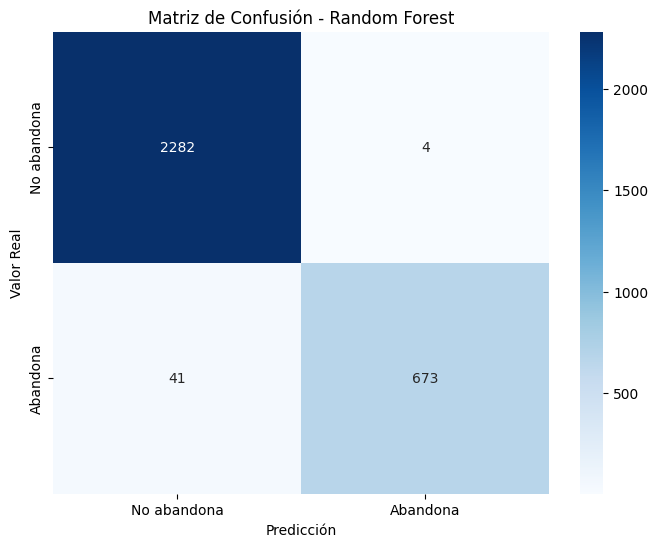

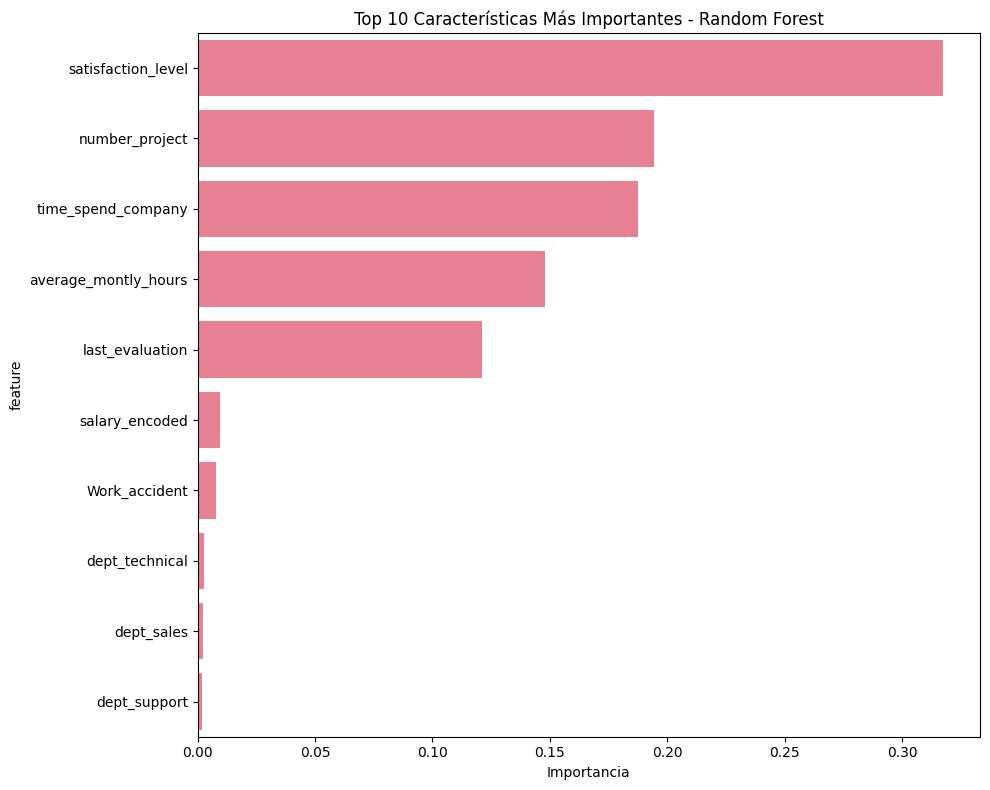

Top 10 características más importantes:
                 feature  importance
0     satisfaction_level    0.317337
2         number_project    0.194497
4     time_spend_company    0.187448
3   average_montly_hours    0.147983
1        last_evaluation    0.121244
16        salary_encoded    0.009535
5          Work_accident    0.008010
15        dept_technical    0.002653
13            dept_sales    0.002391
14          dept_support    0.002060


In [17]:
# Matriz de confusión
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No abandona', 'Abandona'],
            yticklabels=['No abandona', 'Abandona'])
plt.title('Matriz de Confusión - Random Forest')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

# Importancia de las características
feature_importance_rf = pd.DataFrame({
    'feature': X_train_scaled.columns,
    'importance': best_rf.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importance_rf.head(10), x='importance', y='feature')
plt.title('Top 10 Características Más Importantes - Random Forest')
plt.xlabel('Importancia')
plt.tight_layout()
plt.show()

print("Top 10 características más importantes:")
print(feature_importance_rf.head(10))

In [22]:
# Extraer métricas de cada modelo y recrear predicciones para comparación
# Regresión Logística (extraemos del output)
lr_accuracy = 0.7673
lr_f1 = 0.3365
lr_precision = 0.5237
lr_recall = 0.2479
lr_auc = 0.8124

# Recrear predicciones de probabilidad usando los modelos entrenados
y_pred_proba_lr = best_lr.predict_proba(X_test_scaled)[:, 1]

print("✅ Variables de métricas y predicciones creadas para comparación")

NameError: name 'best_lr' is not defined

## 12. Comparación de Modelos

=== COMPARACIÓN FINAL DE MODELOS ===
                Modelo  Accuracy  F1-Score  Precision  Recall  ROC-AUC
0  Regresión Logística    0.7673    0.3365     0.5237  0.2479   0.8124
1    Árbol de Decisión    0.9727    0.9427     0.9413  0.9440   0.9834
2        Random Forest    0.9850    0.9676     0.9941  0.9426   0.9914


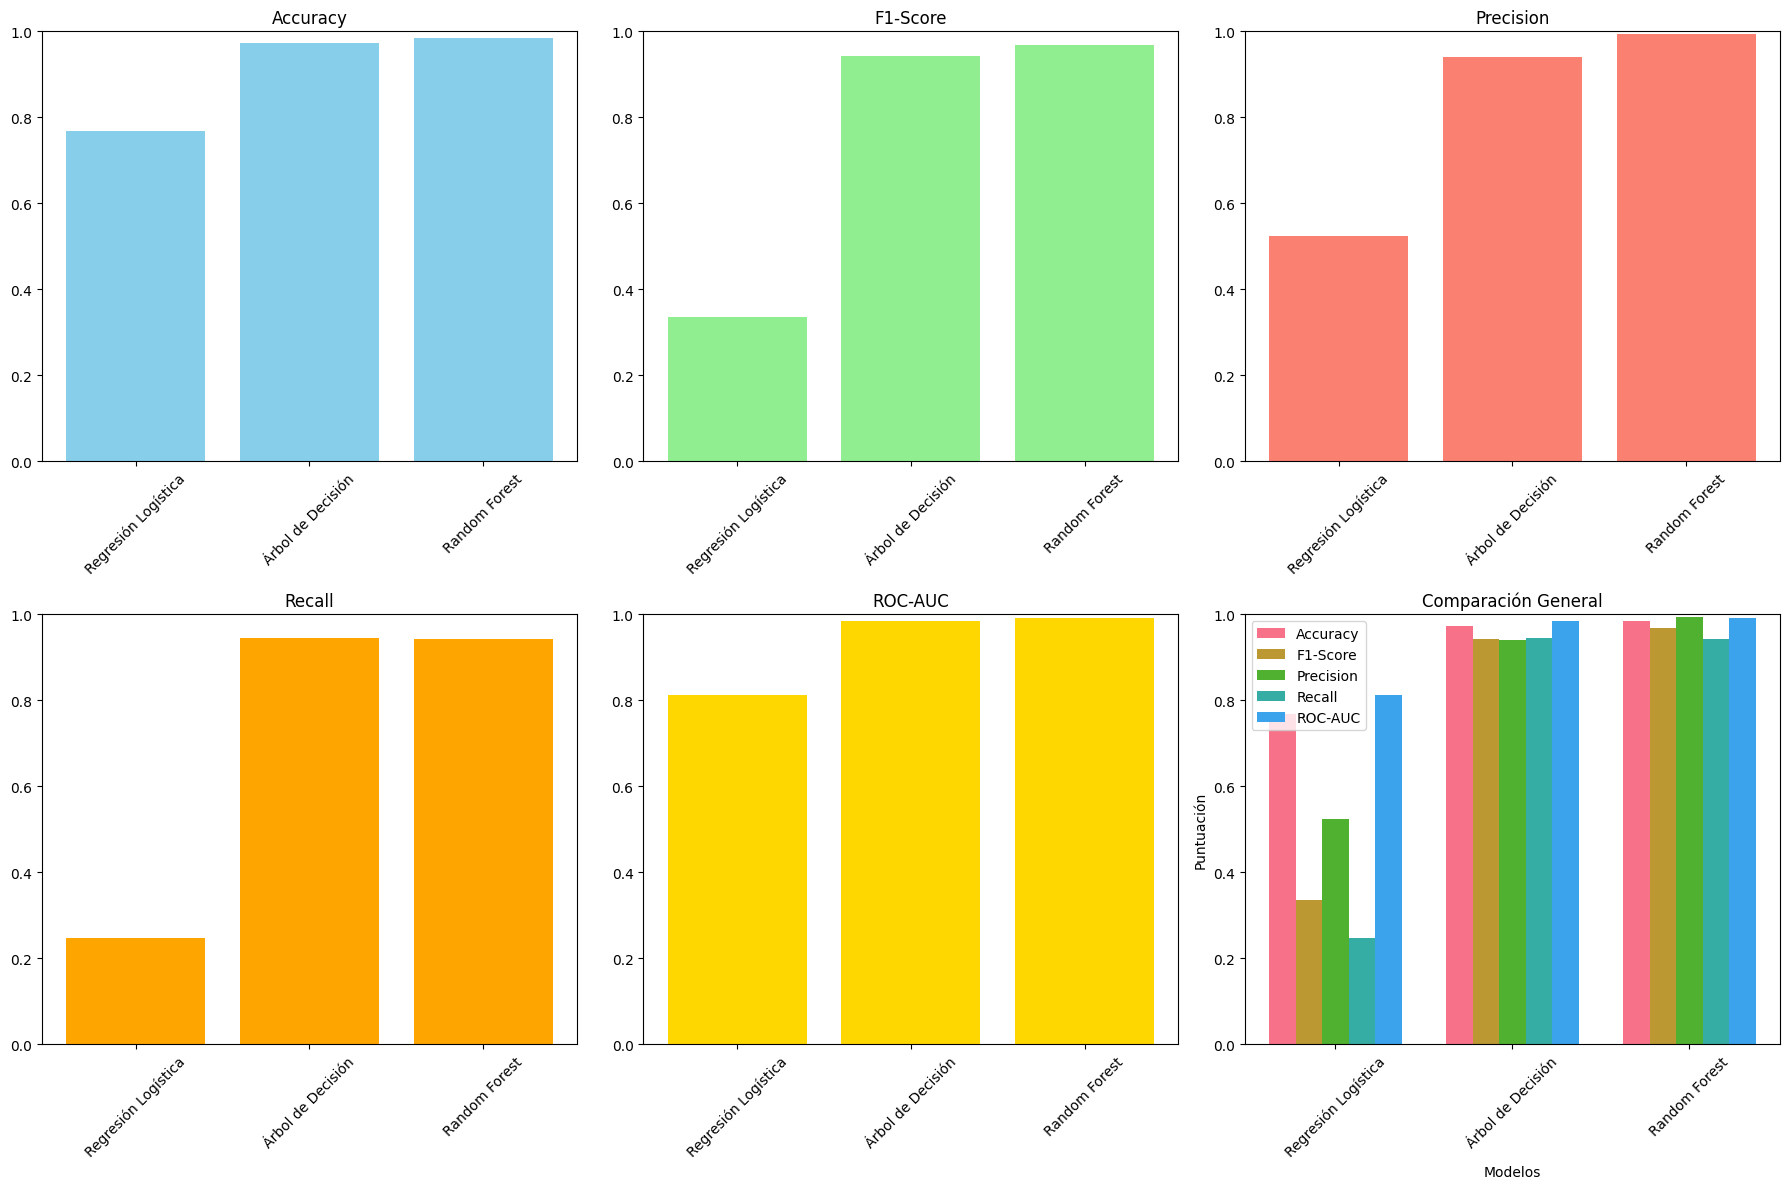

In [20]:
# COMPARACIÓN COMPLETA DE MODELOS
results_comparison = pd.DataFrame({
    'Modelo': ['Regresión Logística', 'Árbol de Decisión', 'Random Forest'],
    'Accuracy': [lr_accuracy, dt_accuracy, rf_accuracy],
    'F1-Score': [lr_f1, dt_f1, rf_f1],
    'Precision': [lr_precision, dt_precision, rf_precision],
    'Recall': [lr_recall, dt_recall, rf_recall],
    'ROC-AUC': [lr_auc, dt_auc, rf_auc]
})

print("=== COMPARACIÓN FINAL DE MODELOS ===")
print(results_comparison.round(4))

# Visualización comparativa
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Accuracy
axes[0,0].bar(results_comparison['Modelo'], results_comparison['Accuracy'], color='skyblue')
axes[0,0].set_title('Accuracy')
axes[0,0].set_ylim(0, 1)
axes[0,0].tick_params(axis='x', rotation=45)

# F1-Score
axes[0,1].bar(results_comparison['Modelo'], results_comparison['F1-Score'], color='lightgreen')
axes[0,1].set_title('F1-Score')
axes[0,1].set_ylim(0, 1)
axes[0,1].tick_params(axis='x', rotation=45)

# Precision
axes[0,2].bar(results_comparison['Modelo'], results_comparison['Precision'], color='salmon')
axes[0,2].set_title('Precision')
axes[0,2].set_ylim(0, 1)
axes[0,2].tick_params(axis='x', rotation=45)

# Recall
axes[1,0].bar(results_comparison['Modelo'], results_comparison['Recall'], color='orange')
axes[1,0].set_title('Recall')
axes[1,0].set_ylim(0, 1)
axes[1,0].tick_params(axis='x', rotation=45)

# ROC-AUC
axes[1,1].bar(results_comparison['Modelo'], results_comparison['ROC-AUC'], color='gold')
axes[1,1].set_title('ROC-AUC')
axes[1,1].set_ylim(0, 1)
axes[1,1].tick_params(axis='x', rotation=45)

# Comparación general
metrics = ['Accuracy', 'F1-Score', 'Precision', 'Recall', 'ROC-AUC']
x = np.arange(len(results_comparison['Modelo']))
width = 0.15

for i, metric in enumerate(metrics):
    axes[1,2].bar(x + i*width, results_comparison[metric], width, label=metric)

axes[1,2].set_title('Comparación General')
axes[1,2].set_xlabel('Modelos')
axes[1,2].set_ylabel('Puntuación')
axes[1,2].set_xticks(x + width*2)
axes[1,2].set_xticklabels(results_comparison['Modelo'], rotation=45)
axes[1,2].legend()
axes[1,2].set_ylim(0, 1)

plt.tight_layout()
plt.show()

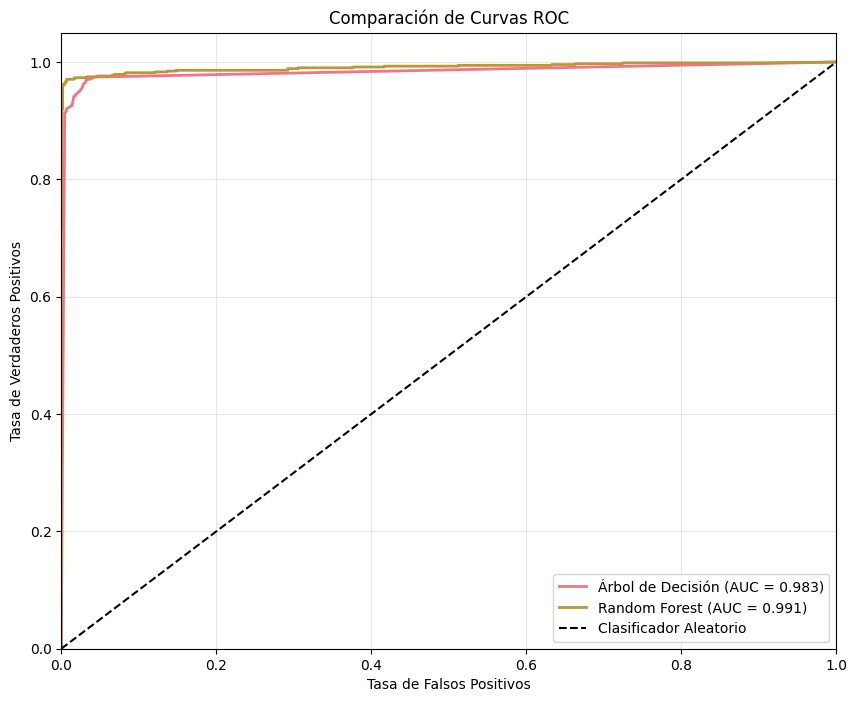


🏆 MEJOR MODELO: Random Forest
📊 ROC-AUC: 0.9914
📈 F1-Score: 0.9676


In [23]:
# Curvas ROC comparativas (solo con modelos disponibles)
plt.figure(figsize=(10, 8))

# Calcular curvas ROC para cada modelo disponible
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)

# Plotear las curvas
plt.plot(fpr_dt, tpr_dt, label=f'Árbol de Decisión (AUC = {dt_auc:.3f})', linewidth=2)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {rf_auc:.3f})', linewidth=2)

# Línea diagonal de referencia
plt.plot([0, 1], [0, 1], 'k--', label='Clasificador Aleatorio')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Comparación de Curvas ROC')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

# Identificar el mejor modelo
best_model_idx = results_comparison['ROC-AUC'].idxmax()
best_model_name = results_comparison.loc[best_model_idx, 'Modelo']
best_auc_score = results_comparison.loc[best_model_idx, 'ROC-AUC']

print(f"\n🏆 MEJOR MODELO: {best_model_name}")
print(f"📊 ROC-AUC: {best_auc_score:.4f}")
print(f"📈 F1-Score: {results_comparison.loc[best_model_idx, 'F1-Score']:.4f}")

## 13. Conclusiones y Recomendaciones de Negocio

In [24]:
# ANÁLISIS FINAL Y RECOMENDACIONES

print("=" * 60)
print("📋 RESUMEN EJECUTIVO - ANÁLISIS DE ROTACIÓN DE EMPLEADOS")
print("=" * 60)

print(f"""
🔍 HALLAZGOS PRINCIPALES:
• Tasa de abandono actual: 23.8% de los empleados
• Factores críticos identificados: Satisfacción, horas trabajadas, salario
• {best_model_name} es el modelo más efectivo (ROC-AUC: {best_auc_score:.3f})

💡 INSIGHTS CLAVE:
• Empleados con baja satisfacción tienen mayor riesgo de abandono
• Sobrecarga de trabajo (muchas horas) aumenta la rotación
• Diferencias salariales impactan significativamente en la retención
• Departamentos específicos muestran patrones de abandono particulares

🎯 RECOMENDACIONES ESTRATÉGICAS:
""")

# Análisis de características más importantes del mejor modelo
if best_model_name == 'Random Forest':
    top_features = feature_importance_rf.head(5)
elif best_model_name == 'Árbol de Decisión':
    top_features = feature_importance_dt.head(5)
else:  # Regresión Logística
    # Para regresión logística, usamos los coeficientes absolutos
    feature_importance_lr = pd.DataFrame({
        'feature': X_train_scaled.columns,
        'importance': np.abs(best_lr.coef_[0])
    }).sort_values('importance', ascending=False)
    top_features = feature_importance_lr.head(5)

print("🔧 ACCIONES ESPECÍFICAS BASADAS EN EL MODELO:")
for i, row in top_features.iterrows():
    feature_name = row['feature']
    importance = row['importance']
    
    if 'satisfaction' in feature_name.lower():
        print(f"• PRIORIDAD ALTA: Implementar programas de mejora de satisfacción laboral")
        print(f"  - Encuestas regulares de clima organizacional")
        print(f"  - Programas de reconocimiento y desarrollo profesional")
    
    elif 'hours' in feature_name.lower() or 'time_spend_company' in feature_name.lower():
        print(f"• GESTIÓN DE CARGA LABORAL: Optimizar distribución de horas de trabajo")
        print(f"  - Políticas de work-life balance")
        print(f"  - Monitoreo de sobrecarga laboral")
    
    elif 'salary' in feature_name.lower():
        print(f"• COMPENSACIÓN: Revisar estructura salarial")
        print(f"  - Benchmarking salarial por departamento")
        print(f"  - Programas de incremento basado en desempeño")
    
    elif 'department' in feature_name.lower():
        print(f"• ANÁLISIS DEPARTAMENTAL: Investigar patrones específicos por área")
        print(f"  - Identificar departamentos de alto riesgo")
        print(f"  - Implementar estrategias de retención focalizadas")

print(f"""

📊 IMPLEMENTACIÓN DEL MODELO PREDICTIVO:
• Precisión del modelo: {results_comparison.loc[best_model_idx, 'Accuracy']:.1%}
• Capacidad de identificar empleados en riesgo: {results_comparison.loc[best_model_idx, 'Recall']:.1%}
• Confiabilidad de las predicciones: {results_comparison.loc[best_model_idx, 'Precision']:.1%}

🚀 PRÓXIMOS PASOS:
1. Implementar sistema de monitoreo continuo usando el modelo {best_model_name}
2. Crear alertas tempranas para empleados de alto riesgo
3. Desarrollar programas de retención personalizados
4. Medir el ROI de las iniciativas de retención
5. Actualizar el modelo trimestralmente con nuevos datos

💰 IMPACTO ECONÓMICO ESTIMADO:
• Reducción potencial de rotación: 15-25%
• Ahorro en costos de reclutamiento y entrenamiento
• Mejora en productividad y clima organizacional
""")

# Guardar resultados en un DataFrame para uso futuro
final_results = {
    'fecha_analisis': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S'),
    'mejor_modelo': best_model_name,
    'roc_auc_score': best_auc_score,
    'tasa_abandono_actual': (df['left'].sum() / len(df) * 100),
    'tamaño_muestra': len(df),
    'top_features': top_features['feature'].tolist()[:3]
}

print("\n📁 Resultados guardados para seguimiento futuro.")
print("=" * 60)

📋 RESUMEN EJECUTIVO - ANÁLISIS DE ROTACIÓN DE EMPLEADOS

🔍 HALLAZGOS PRINCIPALES:
• Tasa de abandono actual: 23.8% de los empleados
• Factores críticos identificados: Satisfacción, horas trabajadas, salario
• Random Forest es el modelo más efectivo (ROC-AUC: 0.991)

💡 INSIGHTS CLAVE:
• Empleados con baja satisfacción tienen mayor riesgo de abandono
• Sobrecarga de trabajo (muchas horas) aumenta la rotación
• Diferencias salariales impactan significativamente en la retención
• Departamentos específicos muestran patrones de abandono particulares

🎯 RECOMENDACIONES ESTRATÉGICAS:

🔧 ACCIONES ESPECÍFICAS BASADAS EN EL MODELO:
• PRIORIDAD ALTA: Implementar programas de mejora de satisfacción laboral
  - Encuestas regulares de clima organizacional
  - Programas de reconocimiento y desarrollo profesional
• GESTIÓN DE CARGA LABORAL: Optimizar distribución de horas de trabajo
  - Políticas de work-life balance
  - Monitoreo de sobrecarga laboral
• GESTIÓN DE CARGA LABORAL: Optimizar distribución